# K-Means

### Cara Kerja K-Means


- $P1 $ = (1,5)
- $P2 $ = (8,8)
- $P3 $ = (8,2)
- $P4 $ = (5,1)

$ K = 2$ ( jumlah cluester )

##### Inisialisasi manual Centroid pada iterasi awal
Centroid 1 = (11,5)
Centroid 2 = (5,1)

Gunakan rumus Eucledian Distance atau manhattan Distance untuk menghitung jarak antar Centroid dengan $P_i$. berikut adalah hasil dari jarak setiap titik dengan bbeberapa cluster.

|--|C1|C2|
|--|--|--|
|P1|0|7.2|
|P2|4.2|7.6|
|P3|4.2|3.1|
|P4|7.2|0|

Pemilihan cluster dengan menentukan nilai terkecil dari jarak $P_i$ dengan setiap Centroid. lalu centroid dengan jarak paling kecil 

##### Inisialisasi Centroid berdasarkan titik tengah dari sebuah cluster pada iterasi awal.

Centroid 1 = 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
 
# tampilkan 3 baris pertama
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# ubah data kategorik menjadi data numerik
df['Gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [4]:
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'Gender'], axis=1)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


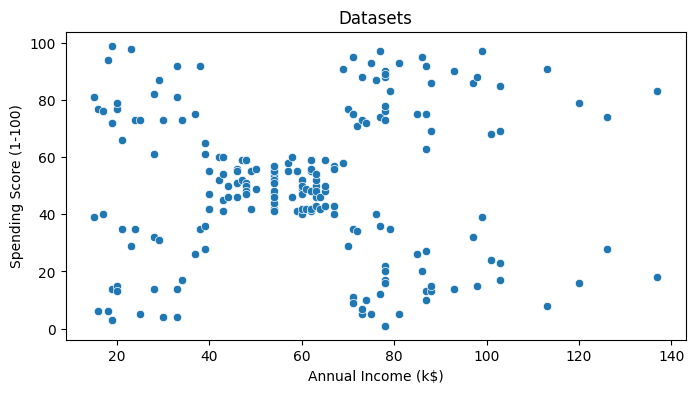

In [5]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'])
plt.title('Datasets')
plt.show()

In [6]:
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    df[f'cluster{i}'] = km.labels_

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
0,1,1,19,15,39,0,0,0,3,1,3,4,5,2,3
1,2,1,21,15,81,0,1,0,3,4,0,2,4,3,4
2,3,0,20,16,6,0,0,0,0,1,3,4,5,5,6
3,4,0,23,16,77,0,1,0,3,4,0,2,4,3,4
4,5,0,31,17,40,0,0,0,0,1,3,4,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,0,1,1,2,0,1,0,3,4,7
196,197,0,45,126,28,0,0,2,1,3,2,3,6,7,2
197,198,1,32,126,74,0,1,1,2,0,1,0,3,4,7
198,199,1,32,137,18,0,0,2,1,3,2,3,6,7,2


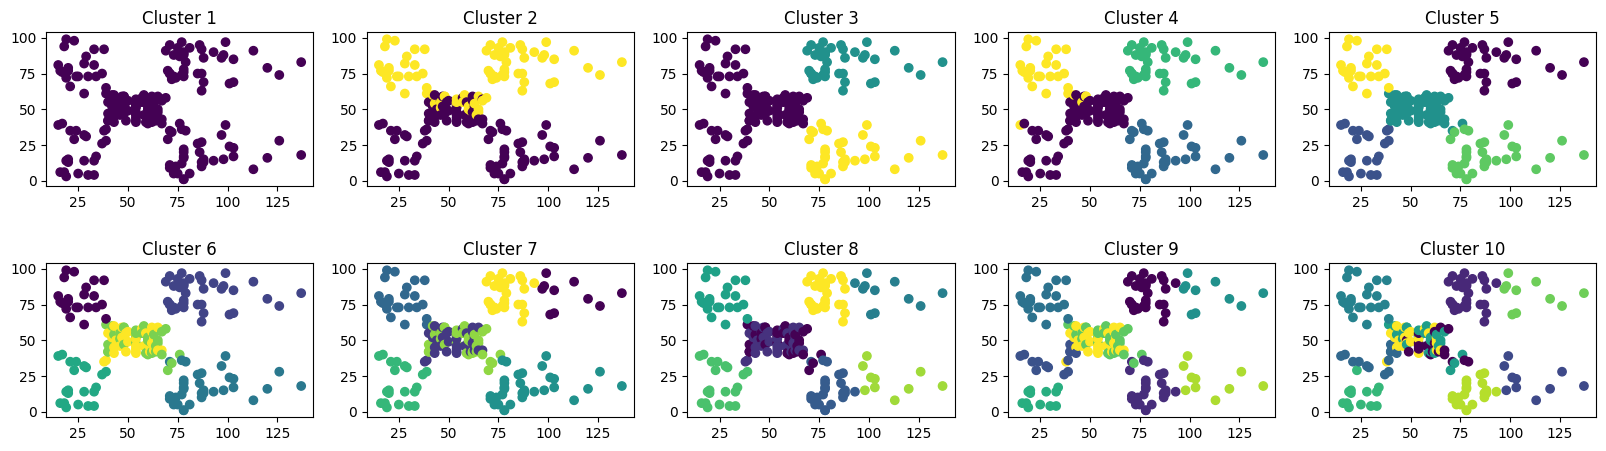

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 5))
plt.subplots_adjust(hspace=0.5)

for i, ax in enumerate(fig.axes, start = 1):
    # print(df[f'cluster{i}'])
    ax.scatter(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], c = df[f'cluster{i}'])
    # ax.set_ylim(3, 1.5)
    # ax.set_xlim(0, 1)
    ax.set_title(f'Cluster {i}')

Text(0, 0.5, 'Inertia')

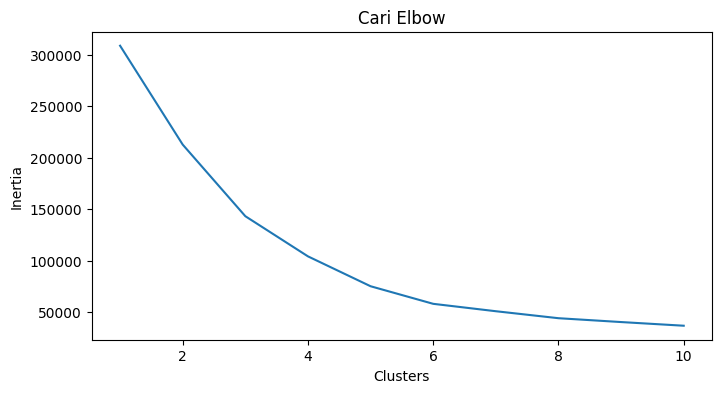

In [9]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [10]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

In [11]:
display(X)

,Age,Annual Income (k$),Spending Score (1-100),Labels
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


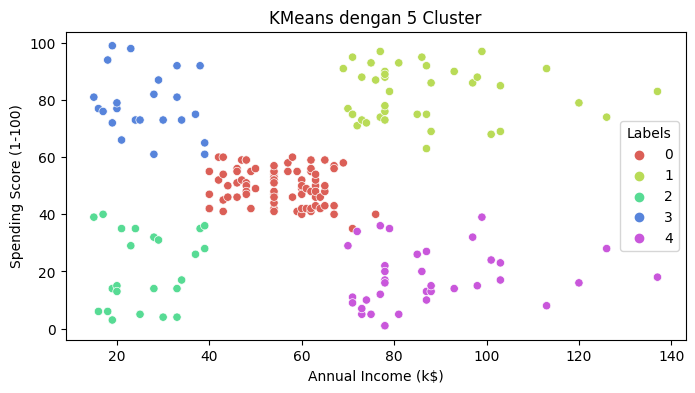

In [12]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()